<a href="https://colab.research.google.com/github/effat38718/CVPR_assignment/blob/master/final_project_fall_20_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import cv2
from tensorflow.keras.models import load_model

In [ ]:
train = pd.read_csv('sign_mnist_train\sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test\sign_mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
labels = train['label'].values

In [ ]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

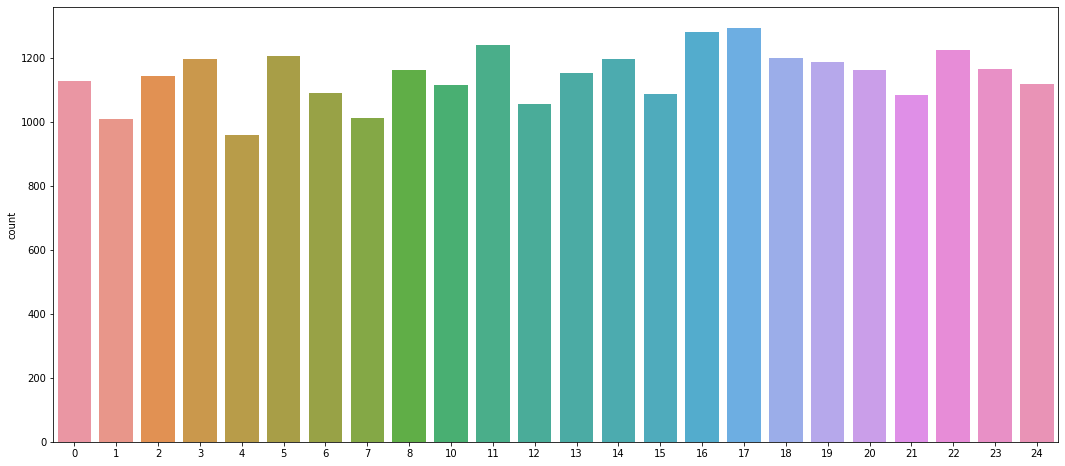

In [ ]:
# plot the quatities of data in each class 
plt.figure(figsize=(18,8))
sns.countplot(x = labels)

In [ ]:
train.drop('label',axis = 1, inplace=True)

In [ ]:
# extract the image data from each row in our csv
images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


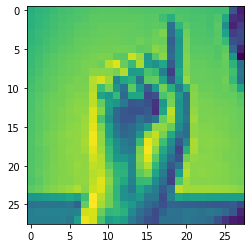

In [ ]:
index = 8
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [ ]:
#use OpenCV to view 10 random images from our training data
for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im = images[rand]

    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
#split our data into x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size= 0.3, random_state= 101)

In [ ]:
#loading the tensorflow modules and define batch size class and epochs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [ ]:
# scale the images
x_train = x_train/255
x_test = x_test/255

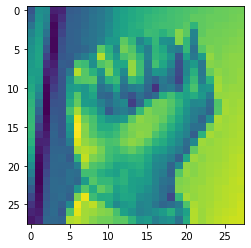

In [ ]:
# reshape the images into the size required by tf and keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [ ]:
# building my model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation= 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation= 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation= 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [ ]:
# compiling the model
model.compile(loss = 'categorical_crossentropy',optimizer= Adam(),metrics=['accuracy'])

In [ ]:
# training
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 3s 8ms/step - loss: 2.4861 - accuracy: 0.2353 - val_loss: 1.4461 - val_accuracy: 0.5521
Epoch 2/10
151/151 [==============================] - 1s 6ms/step - loss: 1.1646 - accuracy: 0.6113 - val_loss: 0.7959 - val_accuracy: 0.7310
Epoch 3/10
151/151 [==============================] - 1s 6ms/step - loss: 0.6645 - accuracy: 0.7758 - val_loss: 0.4056 - val_accuracy: 0.8907
Epoch 4/10
151/151 [==============================] - 1s 6ms/step - loss: 0.4120 - accuracy: 0.8649 - val_loss: 0.3079 - val_accuracy: 0.9018
Epoch 5/10
151/151 [==============================] - 1s 6ms/step - loss: 0.2799 - accuracy: 0.9094 - val_loss: 0.1497 - val_accuracy: 0.9599
Epoch 6/10
151/151 [==============================] - 1s 6ms/step - loss: 0.1796 - accuracy: 0.9451 - val_loss: 0.0942 - val_accuracy: 0.9801
Epoch 7/10
151/151 [==============================] - 1s 6ms/step - loss: 0.1140 - accuracy: 0.9681 - val_loss: 0.0544 - val_accuracy: 0.9887
Epoch 

In [ ]:
model.save("ASL_mnist_cnn.h5")
print("Model Saved")

Model Saved


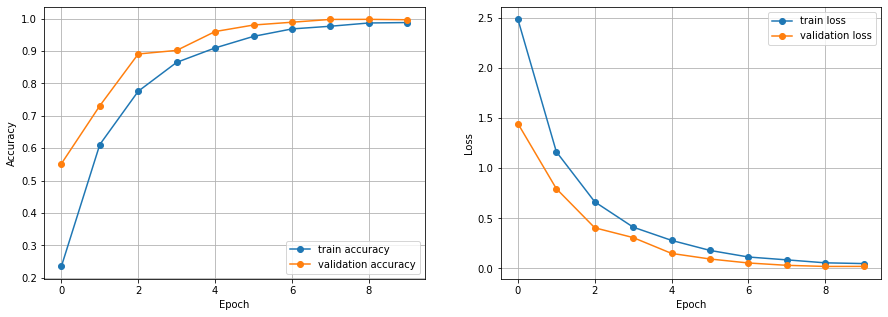

In [ ]:
# graph representation of training
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'o-', label='train loss')
plt.plot(history.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
model = load_model("ASL_mnist_cnn.h5")
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [ ]:
# test phase
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

y_pred = model.predict(test_images)

In [ ]:
# test accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.8641940881204685

In [ ]:
from matplotlib import pyplot
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
	# check for convolutional layer
    if 'conv' not in layer.name:
        continue
	# summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d (None, 26, 26, 32)
2 conv2d_1 (None, 11, 11, 64)
4 conv2d_2 (None, 3, 3, 128)


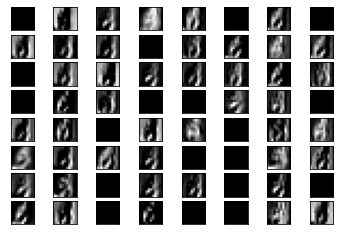

IndexError: index 32 is out of bounds for axis 3 with size 32

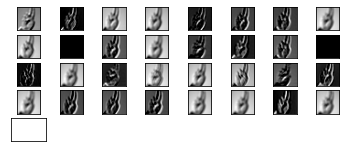

In [ ]:
#Iterate thru all the layers of the model
from tensorflow.keras.models import Model
ixs = [2, 0]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
img = x_train[10]
img = img.reshape(-1, 28, 28, 1)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        for _ in range(square):
			# specify subplot and turn of axis
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
			# plot filter channel in grayscale
            plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
	# show the figure
    plt.show()

In [ ]:
# match letter with labels
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    10: 'K',
                    11: 'L',
                    12: 'M',
                    13: 'N',
                    14: 'O',
                    15: 'P',
                    16: 'Q',
                    17: 'R',
                    18: 'S',
                    19: 'T',
                    20: 'U',
                    21: 'V',
                    22: 'W',
                    23: 'X',
                    24: 'Y',}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

In [ ]:
# test on a webcam

cap = cv2.VideoCapture(0)
while True:

    ret, frame = cap.read()

    frame = cv2.flip(frame, 1)

    roi = frame[100:400, 320:620]
    cv2.imshow('roi',roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28,28), interpolation= cv2.INTER_AREA)

    cv2.imshow('roi scaled as gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)

    roi = roi.reshape(1,28,28,1)

    result = str(model.predict_classes(roi, 1, verbose = 0)[0])
    cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0,255,0),2)
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()

C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


KeyboardInterrupt: 